In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from imageio import imread
import sys

sys.path.insert(0, "../src/")
sys.path.insert(0, "../../project_1/src")
from NeuralNetwork import *
from CostFunctions import *
from ActivationFunctions import *
from SGD import *
from sklearn.model_selection import train_test_split
from FrankeFunction import *
from linear_regression import *
from stat_tools import *

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print("X shape = ", X.shape)
print("y shape = ", y.shape)

# Rescale the X data from [0, 255] -> [0, 1]
# NOTE: Re-Scaling brought the score from ~93 -> ~96 for a 30 layer ReLU
X /= 255.0
np.max(X)

X shape =  (70000, 784)
y shape =  (70000,)


1.0

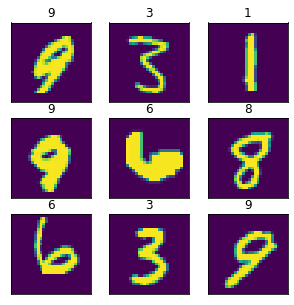

In [3]:
plt.figure(figsize = (5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    pick = np.random.randint(len(X)-1)
    plt.imshow(X[pick].reshape(28, 28))
    plt.title(f"{y[pick]}")
    plt.xticks([]); plt.yticks([])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)

(56000, 784)
(56000,)


In [5]:
# Preprocess Y for our NN
y_train_onehot = np.zeros([len(y_train), 10])
y_test_onehot = np.zeros([len(y_test), 10])

for i, num in enumerate(y_train):
    y_train_onehot[i, int(num)] = 1
    
for i, num in enumerate(y_test):
    y_test_onehot[i, int(num)] = 1

In [6]:
y_test_onehot.shape

(14000, 10)

In [36]:
FFNN = FeedForwardNeuralNetwork(
    X=X_train,
    Y=y_train_onehot,
    cost=CostFunctions.CrossEntropy,
    activation=ActivationFunctions.ReLU,
    activation_out=ActivationFunctions.Softmax,
    network_shape=[30]
)

In [37]:
FFNN.train(int(len(y_train) / 32), 0.01, 100)

In [38]:
y_pred = FFNN.predict(X_test)

In [45]:
y_pred[0:10]

array([[3.89541447e-06, 8.35959100e-01, 1.08672321e-01, 1.48205945e-02,
        3.30178670e-05, 7.99416003e-03, 3.29530701e-03, 3.47209317e-04,
        2.88614593e-02, 1.29350813e-05],
       [5.99024070e-06, 1.70421317e-02, 3.83480422e-03, 2.88523529e-04,
        9.21597263e-05, 8.99649914e-03, 8.21885700e-03, 6.10049709e-06,
        9.61480867e-01, 3.40672658e-05],
       [1.33664346e-06, 1.91587265e-10, 2.65126690e-05, 1.93742304e-08,
        4.22096019e-01, 4.40338723e-06, 2.49678652e-06, 1.11107075e-04,
        5.05152334e-04, 5.77252952e-01],
       [5.57939147e-04, 3.95752573e-09, 9.78236574e-01, 4.06132446e-04,
        2.91646868e-03, 4.78684478e-05, 1.71144924e-02, 2.09397697e-06,
        4.94908031e-04, 2.23518532e-04],
       [7.76939909e-06, 6.39407012e-06, 1.94232023e-05, 3.81544766e-03,
        2.45567424e-09, 9.45284849e-01, 2.76084381e-03, 6.09442418e-12,
        4.81052642e-02, 5.93541716e-09],
       [1.50962166e-03, 5.77185115e-09, 3.20286114e-01, 6.35924428e-05,
   

In [40]:
y_test[0:10]

array(['2', '8', '9', '4', '5', '6', '5', '2', '9', '5'], dtype=object)

In [41]:
y_test_model = np.argmax(y_pred,axis=1)

In [42]:
y_test_data = np.argmax(y_test_onehot,axis=1)

In [43]:
score = sum(np.equal(y_test_data, y_test_model)) / len(y_test_data)
print(score)

0.9137142857142857


In [11]:
Sigmoid.evaluate(FFNN.z[-1][0])

array([0.45808614, 0.40210175, 0.55257191, 0.50701999, 0.51861991,
       0.54738872, 0.52988765, 0.41727841, 0.5145846 , 0.57789262])

In [12]:
Softmax.evaluate(FFNN.z[-1])[0]

array([0.08174792, 0.0650382 , 0.11943328, 0.09946163, 0.10418876,
       0.11695809, 0.10900388, 0.06925077, 0.10251869, 0.13239879])

In [13]:
Sigmoid.evaluate(FFNN.z[0][0])

array([1.05454042e-05, 4.52973150e-02, 5.17627354e-11])

In [14]:
FFNN.a[0][0]

array([1.05454042e-05, 4.52973150e-02, 5.17627354e-11])

In [15]:
FFNN.a[1][0]

array([0.08174792, 0.0650382 , 0.11943328, 0.09946163, 0.10418876,
       0.11695809, 0.10900388, 0.06925077, 0.10251869, 0.13239879])

In [49]:
np.sum(FFNN.a[1][0])

1.0

In [46]:
SKL_NN = MLPClassifier(
    hidden_layer_sizes = [30],
    activation = "relu"
)
SKL_NN.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[30], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [47]:
SKL_NN.score(X_test, y_test)

0.9607142857142857

In [48]:
SKL_NN.predict(X_test)[0:10]

array(['2', '8', '9', '4', '5', '6', '5', '2', '9', '5'], dtype='<U1')